<a href="https://colab.research.google.com/github/irenevanblerck/ResponsibleAI/blob/main/irenevanblerck/notebooks/openimages_assignment_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Responsible AI: Open Images V4__

For this exercise, you are going to work with the Open Images V4 data:

> Open Images is a dataset of ~9M images that have been annotated with image-level labels and object bounding boxes. The training set of V4 contains 14.6M bounding boxes for 600 object classes on 1.74M images, making it the largest existing dataset with object location annotations. The boxes have been largely manually drawn by professional annotators to ensure accuracy and consistency. The images are very diverse and often contain complex scenes with several objects (8.4 per image on average). Moreover, the dataset is annotated with image-level labels spanning thousands of classes.

We will perform an Exploratory Data Analysis (EDA) to identify (potential) instances of bias. Furthermore, you will learn to apply various fairness metrics, and debiasing techniques such as removing ('fairness through unawareness'), adding, and transforming images ('fairness through awareness') to the Open Images V4 dataset. 

__Documentation:__
- [Open Images](https://storage.googleapis.com/openimages/web/index.html)
- [OIDv4 ToolKit](https://github.com/EscVM/OIDv4_ToolKit)

__Learning Objectives:__
1. Identify, and describe (potential) instances of bias in the Open Images V4 dataset
2. Propose, and apply appropriate fairness metrics, and debiasing techniques to the Open Images V4 dataset


## __Learning Objective 1: Identify, and describe (potential) instances of bias in the Open Images V4 dataset__


### __Load the meta data__

Before you start with the exercises, it is good practice to create a virtual environment because it will allow you to install packages and modify your Python environment without fear of breaking packages installed in other environments. For more information on how to create such an environment, see the Anaconda tutorial [Managing Environments](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html). 

__Step 1:__ Install, and subsequently import the necessary Python packages, set your working directory, and load the data files containing the class descriptions and labels.

Data sources (via USB or cloud storage link, ask lecturer):
- class-descriptions
- train-annotations-human-imagelabels




In [1]:
#Add your code

### __Merge the meta data__

The table ```train-annotations-human-imagelabels``` contain information on the image ids, and class labels of the Open Images V4 dataset. The corresponding class descriptions can be found in the ```class-descriptions``` table. Merging the two tables will increase the interpretability of the data: As a human being, a class description (e.g. ```wedding```) is generally more informative than a class label (e.g.```'/m/081hv'```).
   
__Step 2:__ Merge the ```class-descriptions``` and ```train-annotations-human-imagelabels``` tables, and name it ``` train_label_description ```.

In [2]:
#Add your code

### __Exploratory Data Analysis (EDA) on the metadata, Part 1__

__Step 3:__ Perform an Exploratory Data Analysis (EDA) on the table ``` train_label_description ```, and visualize your findings. 

Questions:
- How many classes are there?
- What are the most common classes?  
- Can you have multiple labels/classes in one image?
- Which of the classes might be prone to bias (sensitive attributes)?

etc.

Tip: Need inspiration for your EDA, check Kaggle's [Inclusive Images Challenge](https://www.kaggle.com/c/inclusive-images-challenge/data?select=train_human_labels.csv). 




In [3]:
#Add your code

__Step 3:__ Subset the data by selecting one value (i.e. class) in the column ```LabelName``` located within the table  ```train_label_description```. Name the table ```subset```.

__Examples:__

LabelName|Description
:-----:|:-----:
'/m/03bt1vf'| woman
'/m/01f43'| beauty
'/m/019nj4'| smile
'/m/0fczf'| nurse
'/m/0fsbk0'| health care practitioner
'/m/027qf2'| chemical engineer
'/m/02fbcn'| bartender
'/m/081hv'| wedding

<br>You can also use other tools to filter through the ```class-descriptions``` table. For example, I personally like to use Microsoft Excel (do not tell Nitin or Bram, they will probably laugh at me...) to find interesting classes.  

<br>

![Alt Text](https://media.giphy.com/media/UMyvk17PIo3SiZQWju/giphy.gif) 

In [4]:
#Add your code

Every image in Open Images V4 can contain multiple image-level labels across hundreds of classes. For example:

1. Place [wedding image 1](../../Study%20Content/Responsible%20and%20Explainable%20AI/notebooks/data/92c79c374cd829f8.jpg), [wedding image 2](../../Study%20Content/Responsible%20and%20Explainable%20AI/notebooks/data/f7cdb1d47905332a.jpg) and corresponding [meta data](../../Study%20Content/Responsible%20and%20Explainable%20AI/notebooks/data/wedding.csv) into your working directory.
2. Run the code block below. 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
%matplotlib inline

example = pd.read_csv('wedding.csv')

m_labels = example.Description_x.str.split().tolist()

map_label_to_des = dict(zip(example.LabelName_x.values, example.Description_x.values))

num_of_imgs = 2
des_labels = []
for i in np.arange(num_of_imgs):
    j = [map_label_to_des.get(item, item) for item in m_labels[i]]
    des_labels.append(j)
    
img_list = ['./{}.jpg'.format(id_) for id_ in example.ImageID.values]
fig, ax = plt.subplots()
fig.set_size_inches(25, 25)
ax.set_axis_off()
for n, (image, label) in enumerate(zip(img_list, des_labels)):
    a = fig.add_subplot(num_of_imgs//1, num_of_imgs//1, n+1)
    img = io.imread(image, 1)
    img = np.float32(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.title(label, fontsize=15)
    plt.imshow(img)


__Step 4:__ Merge the tables ```subset``` and```train_label_description``` to match the format:

ImageID|Source_x|LabelName_x|Confidence_x|Description_x|LabelName_y|Confidence_y|Description_y
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
000002b66c9c498e|crowdsource-verification|/m/01kcnl|1|Birthday|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/010l12|0|Roller coaster|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/012c4n|0|Cucurbita|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/012mj|1|Alcoholic beverage|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/012yh1|1|Style|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/014j1m|0|Apple|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/014l8n|0|Yogurt|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/014sv8|1|Human eye|/m/081hv|0|Wedding
000002b66c9c498e|verification|/m/01599|0|Beer|/m/081hv|0|Wedding

<br>Name you newly merged table ```train_[fill in class description value]```. 

<br>The table should include a column filled with your chosen class label value (i.e. ```LabelName_y```), and another column containing the additional class labels (i.e. ```Description_x```) associated with a particular image (i.e. ```ImageID```). 

In [ ]:
#Add your code

As you may have noticed the data contains a column ```Confidence[_x/y]```, which includes positive as well as negative label values (1 and 0 confidence respectively. 

> ... Positive labels are classes that have been verified to be in the image while negative labels are classes that are verified to not be in the image. Negative labels are useful because they are generally specified for classes that you may expect to appear in a scene but do not. For example, if there is a group of people in outfits on a field, you may expect there to be a ball. If there isn’t one, that would be a good negative label ([Source](https://medium.com/voxel51/loading-open-images-v6-and-custom-datasets-with-fiftyone-18b5334851c3)).

A negative label can be an indication that there is bias present in the dataset. When you take a look at the wedding example, the value 'Ivory' is common in the case of a negative ```Confidence_y``` value. In other words, when the human annotator encounters an image with a ```Description_x``` value of 'Ivory' he/she is likely to incorrectly label ```Description_y``` as 'wedding' (i.e. false positive). In a traditional western wedding, the bride often dresses in white/ivory etc. But, that does not mean that all brides adhere to this clothing tradition. Take a country like Marocco, where some brides wear a Lebsa lfasiya:

>Lebsa lfasiya is the traditional dress from the Fez region, also called "ebsa lekbira" (the great outfit). Its large size and shape and accompanying elaborate jewelry characterize this type of wedding dress. It can be white, red, or green ([Source](https://www.moroccoworldnews.com/2020/07/310720/marrying-love-and-fashion-wedding-dresses-in-morocco)).

<img src="https://www.moroccoworldnews.com/wp-content/uploads/2020/07/Marrying-Love-Fashion-Wedding-Dresses-and-Morocco.jpg" alt="drawing" width="400"/>

*Figure 1. A woman wearing a traditional Maroccan wedding dress called a Lebsa lfasiya.*

Quite different from a traditional western wedding dress, right?

__Step 5:__ Subset the data into two datasets: one where the value of ```Confidence_y```  equals 0 named ```[fill in class description value]_negative``` , and another where the value of ```Confidence_y``` equals 1 named ```[fill in class description value]_negative```. Count the most common ```Description_x``` values for both subsets. Visualize your results. 

In [ ]:
#Add your code

__Step 6:__ Did you find any instance of bias in the Open Images V4 dataset? If your answer is 'No', you need to dig deeper into the data! Elaborate on your answer.

Add your answer

### __Load the image data__

Downloading the Open Images V4 data is quite cumbersome. The (meta) data files are large, and often need a good amount of preprocessing to make them ready for an ML analysis. The OIDv4 ToolKit enables you to download a subset of the data (less time spend on downloading data means more time for analysis...yeah!). Conveniently, it automatically transforms the image (meta) data into the correct format for Keras.

__Step 7:__ Clone the [OIDv4 ToolKit](https://github.com/EscVM/OIDv4_ToolKit) GitHub repository. 

__Step 8:__ Open the cloned repository in the Command Prompt (i.e. terminal). For more information, run the code to see the tutorial below: 

In [ ]:

from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/bgSSJQolR0E" frameborder="0" allowfullscreen></iframe>')


__Step 9:__ Activate your virtual environment in the Command Prompt, and follow OIDv4 ToolKit's installation procedure.  

__Step 10:__ Follow the instructions listed under the heading '2.1 Download different classes in separated folders' of the OIDv4 ToolKit repository. Transfer the newly created image directories to your working directory. 

### __Exploratory Data Analysis (EDA) on the metadata, Part 2__

Now we have loaded the image data, you want to redo some of the steps listed in part 1 of the EDA. But before we proceed with the EDA, you need to remove some rows in the ```train_[fill in class description value]``` table. If a value in ```ImageID``` cannot be linked to actual images in your directory, you need to remove the corresponding row. 

__Step 11:__ Create a list containing all the image names (i.e. ```ImageID```) without its extension (e.g. .jpg), and use it to filter out all the redundant rows in your ```train_[fill in class description value]``` table.

In [ ]:
#Add your code

__Step 12:__ Perform another EDA on your ```train_[fill in class description value]``` table. 

In [ ]:
#Add your code

## __Learning Objective 2: Propose, and apply appropriate fairness metrics, and debiasing techniques to the Open Images V4 dataset (Part 1, Pre-processing)__

### __Mitigate bias__ 

Unfortunately, most of the current fairness enhancing techniques only apply to tabular data. Our project is focused on image data. Thus, we have to be a bit creative here. One way to mitigate bias in the pre-processing stage is by applying the 'fairness through unawareness' method, which basically means that you remove as much 'sensitive' data as possible. In our wedding example, that would encompass the rows of data where the ```Description_x``` value equals 'Ivory'. 

__Step 1:__ Apply the 'fairness through unawareness' method to your Open Images V4 dataset (meta/image data!). Elaborate on your approach. 

In [ ]:
#Add your code

Add your answer

Sometimes, you do not want to remove any data instances. For example, when you already have a relatively small dataset. Remember neural networks require a vast amount of training examples!  

Another method to mitigate bias, which does not reduce the size of your dataset, is 'fairness through awareness'. In our wedding example, this would mean that we need to include images that depict a wider range of wedding garments. To make our dataset more inclusive (and thus representative), we could for example scrape the web for images of Lebsa lfasiya dresses, and add those to your dataset.

__Step 2:__ Apply the 'fairness through awareness' method (i.e. add new instances) to your Open Images V4 dataset (meta/image data!). Elaborate on your approach.

For a web scraping tutorial in Python, run the code below: 

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/stIxEKR7o-c" frameborder="0" allowfullscreen></iframe>')

In [ ]:
#Add your code

In the unfortunate situation, when there is no additional data available. You can apply data augmentation techniques to your dataset to improve the performance of your ML model (i.e. reduce overfitting!):

> Data Augmentation is a technique that can be used to artificially expand the size of a training set by creating modified data from the existing one ([Source](https://neptune.ai/blog/data-augmentation-in-python)).

Keep in mind, the goal of these transformations is to make your dataset either more balanced and/or representative.

__Step 3:__ Identify images that depict/represent marginalized groups (e.g. non-ivory/white wedding dresses, LGBTIQA+ couples) in the Open Images V4 dataset, and transfer them to a new directory. See code below:

In [ ]:
import shutil
import os

src_dir = #Insert image source directory
dst_dir = #Insert image destination directory
image_names = #Insert image name (without their extension, e.g. .jpg)
for image_name in image_names:
    shutil.copy(os.path.join(src_dir, image_name+'.jpg'), dst_dir)

__Step 4:__ Apply data augmentations techniques to your subset, and visualize your results.

In [ ]:
#Add your code

__Step 5:__ Add the augmented images to your train set/directory.

## __Learning Objective 2: Propose, and apply appropriate fairness metrics, and debiasing techniques to the Open Images V4 dataset (Part 2, In-processing)__


Say we want to train a binary classifier that can predict if an image depicts a wedding or not. As with the Open Images V4 dataset, our 'imaginary' dataset mostly contains images of traditional American (i.e. Western) weddings. Images depicting traditional Morrocan weddings are underrepresented in the data. See data distribution below:


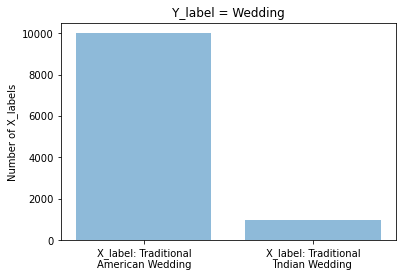

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap

classes = ['X_label: Traditional American Wedding', 'X_label: Traditional Marrocan Wedding']
classes = [ '\n'.join(wrap(c, 20)) for c in classes ]
y_pos = np.arange(len(classes))
count = [10000,1000]

plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Number of X_labels')
plt.title('Y_label = Wedding')

plt.show()

With correct bias initialization during training you can mitigate (some of the) bias introduced by the unbalanced dataset: By putting emphasis on the minority class the model does not spend the first few epochs just learning that the minority examples are unlikely (i.e. learning the bias). In Keras initialize the bias with the function [```bias_initializer```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). 

In the case of the log loss metric, the baseline of dumb, by-chance prediction is 0.693 for a balanced dataset. This number is obtained by predicting the prevalance or p, and value it at p = 0.5 for any class of the binary problem:

Log Loss = -log(p)
<br>p = (1 / N)

N|2|3|5|7|10|15|20|30|50
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
**Log Loss**|0.69|1.1|1.61|1.95|2.3|2.71|3|3.4|3.91

Code examples:

In [ ]:
import math

prev_class_1 = 0.5
prev_class_2 = 0.5
dumb_baseline = 0.5

log_loss = - prev_class_1 * (math.log(dumb_baseline)) - prev_class_2 * (math.log(dumb_baseline))

#OR

#N = 2

#log_loss = -(math.log(1 / N))

print(log_loss)


0.6931471805599453


The baseline of dumb, by-chance prediction value gets increasingly smaller when the data becomes more and more unbalanced. For example, a log loss value of 0.5 with p = 0.1 (i.e. prevalance of traditional Marrocan wedding labels) indicates that the model is performing poorly.

p|1|2|3|5|10|20|30|40|50|60|70|90|95|97|98|99
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
**Log Loss**|0.06|0.1|0.13|0.2|0.33|0.5|0.61|0.67|0.69|0.67|0.61|0.33|0.2|0.13|0.1|0.06


A correct dumb baseline for this particular dataset would be around:

In [ ]:
import math

prev_minority_class = 0.1
prev_majority_class = 0.9

log_loss = - prev_minority_class * (math.log(prev_minority_class)) - prev_majority_class * (math.log(prev_majority_class))

print(log_loss)



0.3250829733914482


If you set the initial bias properly (in the last dense layer of your network), the model is likely to provide more reasonable initial guesses. Code example:

In [ ]:
correct_bias = np.log([prev_minority_class/prev_majority_class]) #Count of X_labels: Traditional American wedding, and traditional Marrocan wedding.

model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', bias_initializer=correct_bias))

In addition, try to complement your analysis with metrics that focus on the minority classes, such as recall.

For more information on bias initialization in Keras: [Classification on imbalanced data](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data). 

__Step 6:__ Add a custom bias_initializer to your Keras model. Retrain your model, and evaluate its output. What was the effect of the custom bias_initializer? Elaborate on your answer. 

In [ ]:
#Add your code

## __Learning Objective 2: Propose, and apply appropriate fairness metrics, and debiasing techniques to the Open Images V4 dataset (Part 3, Post-processing)__

Although, the fairness libraries (e.g. aif360) currently do not support image data. You can calculate many of the metrics by hand. For instructions see, [Fairness: Evaluating for Bias](
https://developers.google.com/machine-learning/crash-course/fairness/evaluating-for-bias).


__Step 8:__ Apply post-processing fairness enhancing metrics to the output of your ML model (e.g. equality of opportunity). Evaluate your result. 


In [ ]:
#Add your code

## __The End__

![Alt Text](https://media0.giphy.com/media/27Y1W0GCKQtDq/giphy.gif) 

__Title - Responsible AI: Open Images V4__
<br> __Author - Irene van Blerck__
<br> __Created On - 11 Januari 2021__
